In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import re
import csv
import statsmodels.formula.api as smf

In [ ]:
df = pd.read_csv('album_datos1.txt')

In [ ]:
#Vemos las primeras filas del df
df.head()

,id,titulo,artista,precio,fecha,idioma,n_canciones,genero
0,1,Divide,Ed Sheeran,5000,2017,EN,16,Pop
1,2,A Contraluz,La Vela Puerca,7500,2004,ES,14,Rock Nacional
2,3,Tú crees en mi?,Emilia,4200,2022,ES,8,Urbano Latino
3,4,Cupido - TINI,Tini Stossel,5600,2023,ES,10,Pop
4,5,Funk Generation: A Favela Love Story,Annita,3200,2023,POR,3,Electro Pop


In [ ]:
#Vemos las últimas filas del df
df.tail()

,id,titulo,artista,precio,fecha,idioma,n_canciones,genero
0,1,Divide,Ed Sheeran,5000,2017,EN,16,Pop
1,2,A Contraluz,La Vela Puerca,7500,2004,ES,14,Rock Nacional
2,3,Tú crees en mi?,Emilia,4200,2022,ES,8,Urbano Latino
3,4,Cupido - TINI,Tini Stossel,5600,2023,ES,10,Pop
4,5,Funk Generation: A Favela Love Story,Annita,3200,2023,POR,3,Electro Pop


In [ ]:
#Vemos las columnas, los nulos y los tipos de datos de cada una
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           5 non-null      int64 
 1   titulo       5 non-null      object
 2   artista      5 non-null      object
 3   precio       5 non-null      int64 
 4   fecha        5 non-null      int64 
 5   idioma       5 non-null      object
 6   n_canciones  5 non-null      int64 
 7   genero       5 non-null      object
dtypes: int64(4), object(4)
memory usage: 452.0+ bytes


In [ ]:
#Vemos las medidas descriptivas generales de las columnas numéricas
df.describe()

,id,precio,fecha,n_canciones
count,5.000000,5.000000,5.000000,5.000000
mean,3.000000,5100.000000,2017.800000,10.200000
std,1.581139,1615.549442,8.105554,5.118594
min,1.000000,3200.000000,2004.000000,3.000000
25%,2.000000,4200.000000,2017.000000,8.000000
50%,3.000000,5000.000000,2022.000000,10.000000
75%,4.000000,5600.000000,2023.000000,14.000000
max,5.000000,7500.000000,2023.000000,16.000000


In [ ]:
#Vemos si hay nulos en el df
df.isna().sum()

id             0
titulo         0
artista        0
precio         0
fecha          0
idioma         0
n_canciones    0
genero         0
dtype: int64

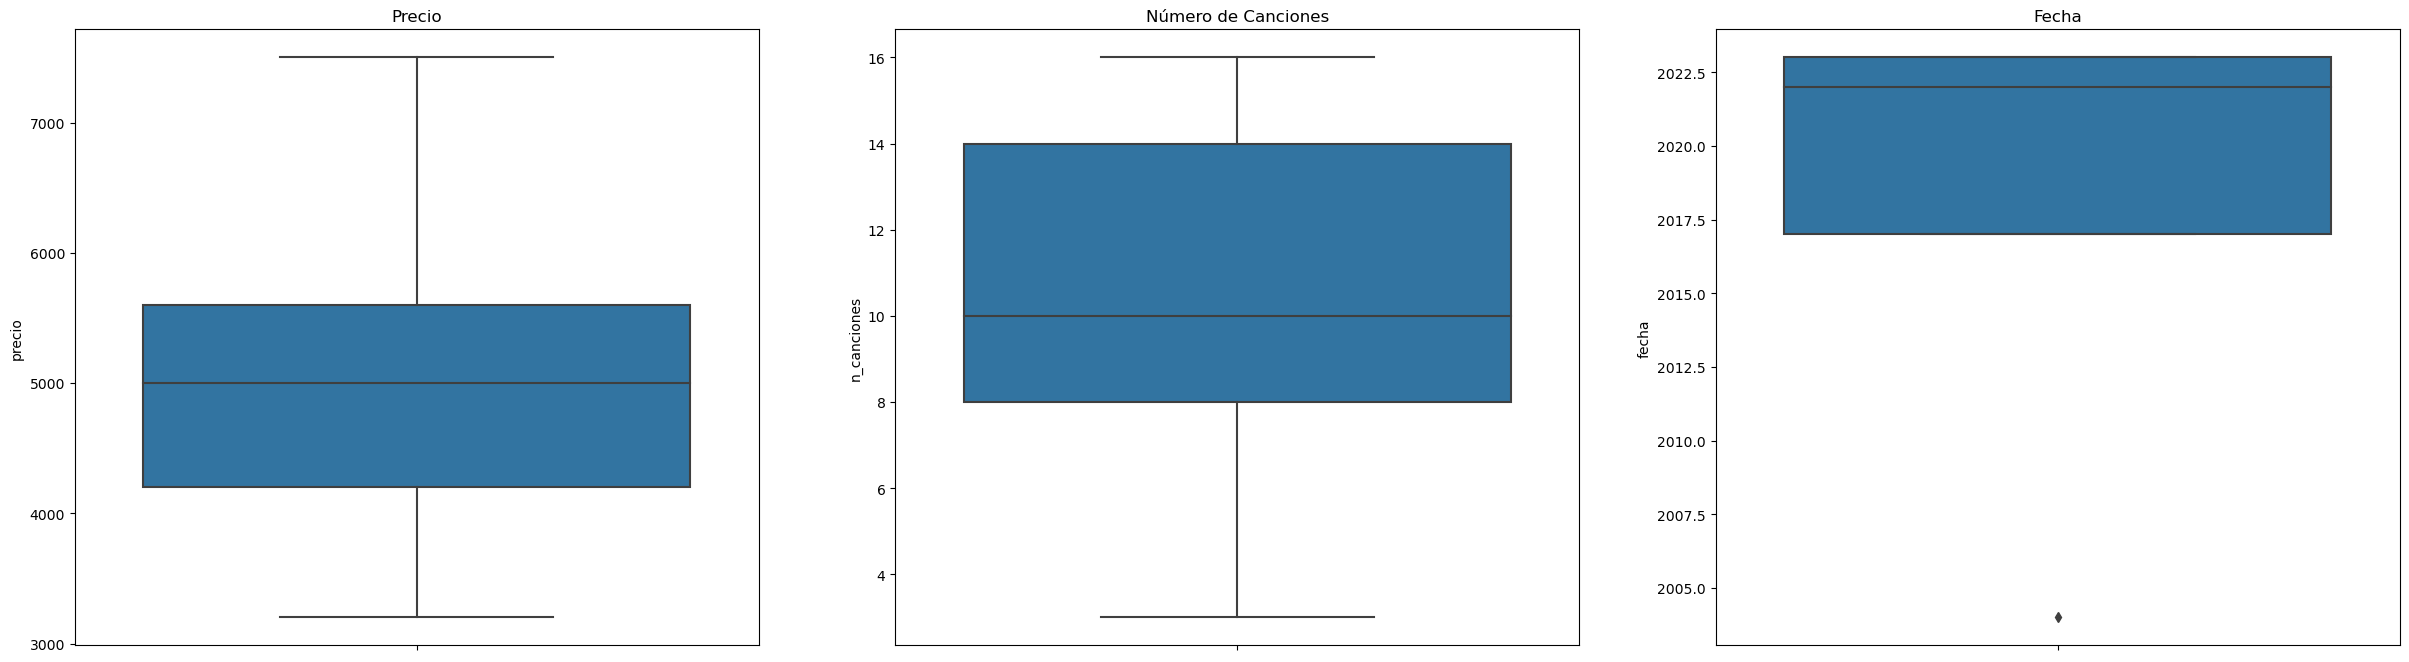

In [ ]:
#Vemos si hay outliers en las columnas
fig, axes = plt.subplots(1, 3, figsize=(30, 8))

sns.boxplot(y='precio', data=df, ax=axes[0])
axes[0].set_title('Precio')
axes[0].set_xlabel('')

sns.boxplot(y='n_canciones', data=df, ax=axes[1])
axes[1].set_title('Número de Canciones')
axes[1].set_xlabel('')

sns.boxplot(y='fecha', data=df, ax=axes[2])
axes[2].set_title('Fecha')
axes[2].set_xlabel('')

plt.show()

In [ ]:
#Vemos cuantos discos tiene cada artista
df['artista'].value_counts()

Ed Sheeran        1
La Vela Puerca    1
Emilia            1
Tini Stossel      1
Annita            1
Name: artista, dtype: int64

In [ ]:
#Vemos el album con el precio más alto
df[df['precio'] == df['precio'].max()]

,id,titulo,artista,precio,fecha,idioma,n_canciones,genero
1,2,A Contraluz,La Vela Puerca,7500,2004,ES,14,Rock Nacional


In [ ]:
#Vemos el album con el precio más bajo
df[df['precio'] == df['precio'].min()]

,id,titulo,artista,precio,fecha,idioma,n_canciones,genero
4,5,Funk Generation: A Favela Love Story,Annita,3200,2023,POR,3,Electro Pop


In [ ]:
#Vemos el album con más canciones
df[df['n_canciones'] == df['n_canciones'].max()]

,id,titulo,artista,precio,fecha,idioma,n_canciones,genero
0,1,Divide,Ed Sheeran,5000,2017,EN,16,Pop


In [ ]:
#Vemos cuantos álbumes hay en cada idioma
df['idioma'].value_counts()

ES     3
EN     1
POR    1
Name: idioma, dtype: int64

In [ ]:
#Vemos el precio promedio de los álbumes
df['precio'].mean()

5100.0

In [ ]:
#Vemos qué genero tiene más canciones por álbum en promedio
df.groupby('genero').agg(n_canciones_prom = ('n_canciones', 'mean'), precio_prom = ('precio', 'mean'))

,n_canciones_prom,precio_prom
genero,,
Electro Pop,3.0,3200.0
Pop,13.0,5300.0
Rock Nacional,14.0,7500.0
Urbano Latino,8.0,4200.0


In [ ]:
#Parecería ver que a más canciones, mayor es el precio. Vamos a calcular a ver si hay correlación entre ambas variables
df['precio'].corr(df['n_canciones'])

0.7285949418822334

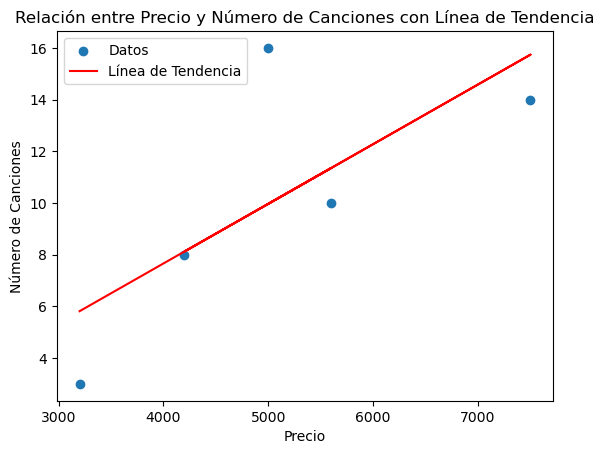

In [ ]:
#La Correlación da bastante alta. veamosla graficamente

coeficientes = np.polyfit(df['precio'], df['n_canciones'], 1)
linea_tendencia = np.polyval(coeficientes, df['precio'])

plt.scatter(df['precio'], df['n_canciones'], label='Datos')
plt.plot(df['precio'], linea_tendencia, color='red', label='Línea de Tendencia')
plt.title('Relación entre Precio y Número de Canciones con Línea de Tendencia')
plt.xlabel('Precio')
plt.ylabel('Número de Canciones')
plt.legend()
plt.show()

In [ ]:
#Podemos generar un modelo de regresión lineal para ver cuánto varía el precio dependiendo de el n de canciones
features = ['n_canciones']
formula = "precio ~ " + ' + '.join(features)
modelo = smf.ols(formula, data = df)
modelo = modelo.fit()
modelo.summary()

C:\Users\josik\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 precio   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     3.395
Date:                Tue, 14 Nov 2023   Prob (F-statistic):              0.163
Time:                        00:05:53   Log-Likelihood:                -41.582
No. Observations:                   5   AIC:                             87.16
Df Residuals:                       3   BIC:                             86.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2754.3893   1395.467      1.974      0.143   -1686.610    7195.388
n_canciones   229.9618    124.814      1.842      0.163    -167.253     627.177
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.850
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.211
Skew:                           0.143   Prob(JB):                        0.900
Kurtosis:                       2.036   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

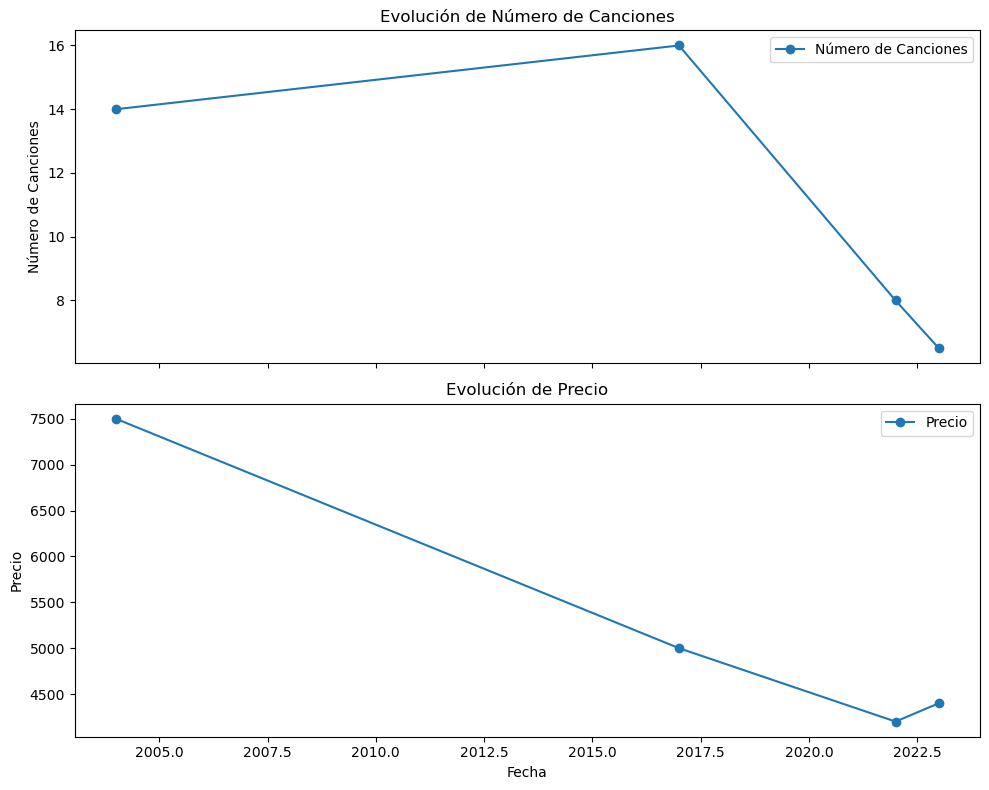

In [ ]:
#Podemos ver la como evoluciona el precio y las n_canciones a lo largo del tiempo
df_x_fecha = df.groupby('fecha').agg(n_canciones_prom = ('n_canciones', 'mean'), precio_prom = ('precio', 'mean'))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)


ax1.plot(df_x_fecha.index, df_x_fecha['n_canciones_prom'], label='Número de Canciones', marker='o')
ax1.set_title('Evolución de Número de Canciones')
ax1.set_ylabel('Número de Canciones')
ax1.legend()

ax2.plot(df_x_fecha.index, df_x_fecha['precio_prom'], label='Precio', marker='o')
ax2.set_title('Evolución de Precio')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Precio')
ax2.legend()
plt.tight_layout()

plt.show()


In [ ]:
#Podemos filtrar el df por el genero pop y analizarlo separado
df_pop = df[df['genero'] == 'Pop']
df_pop.head()

,id,titulo,artista,precio,fecha,idioma,n_canciones,genero
0,1,Divide,Ed Sheeran,5000,2017,EN,16,Pop
3,4,Cupido - TINI,Tini Stossel,5600,2023,ES,10,Pop


In [ ]:
df_pop['n_canciones'].mean()

13.0

In [ ]:
df_pop['artista'].unique()

array(['Ed Sheeran', 'Tini Stossel'], dtype=object)